In [2]:
import numpy as np
class LogisticRegression(object):
    '''
    Logistic Regression for binary classification.
    
    :param eta: learing rate
    :param n_iter: training times
    :param random_state: random functionn parameter
    :param C: parameter for regularizationn. To avoid weight bias.
    :param w_: weight vector for features
    :param cost_: cost record for the whole training process
    '''
    def __init__(self, eta=0.01, n_iter=50, random_state=1, C=10000):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        self.C=C
    
    def fit(self, X, y):
        '''
        Main training function. With regularization term. 
        '''
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.1, size=1 + X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.sigmoid(net_input)
            errors = y - output
            
            # regularization in weight update
            self.w_[1:] += self.eta * np.dot(errors, X) - self.w_[1:]/self.C  # differenciation of cost function
            self.w_[0] += self.eta * errors.sum()
            
            #regularization in cost function calculation
            cost = -y.dot(np.log(output)) -((1 - y).dot(np.log(1 - output))) + np.sum(self.w_[1:]**2, axis=0)/(self.C*2)
            self.cost_.append(cost)
        return self
    
    def net_input(self, X):
        '''
        1st step. Net input function. 
        '''
        return np.dot(X, self.w_[1:].T) + self.w_[0]
    
    def sigmoid(self, X):
        '''
        2nd step. Logistic activation function. 
        '''
        return np.exp(X)/(1+np.exp(X))
    
    def probability(self, X):
        '''
        Give the probability of being in current training class.
        '''
        return self.sigmoid(self.net_input(X))
    
    def predict(self, X):
        '''
        Threshold function for binary classification.
        '''
        return np.where(self.sigmoid(self.net_input(X)) >= 0.5, 1, 0)
    
    def get_weight_parameter(self):
        '''
        Show weight vector if needed. 
        '''
        return self.w_

In [22]:
class MultiLogisticRegression(object):
    '''
    Logistic Regression for multiclass classification.
    
    :param eta: learing rate
    :param n_iter: training times
    :param random_state: random functionn parameter
    :param C: parameter for regularizationn. To avoid weight bias.
    :param lgrs: list of logistic regression classifiers
    :param classes: list of class corresponding to each classifier
    '''
    def __init__(self, eta=0.01, n_iter=50, random_state=1, C=100):
        self.eta = eta  
        self.n_iter = n_iter 
        self.random_state = random_state 
        self.C = C
        
    def fit(self, X, y):
        '''
        Get classes needs to classify. Train classifiers for each class. 
        '''
        self.classes = np.unique(y.tolist())
        self.lgrs = []
        for class_ in self.classes:
            y_temp = np.where(y == class_, 1, 0)
            # print(y_temp)
            self.lgrs.append(LogisticRegression(eta=self.eta, n_iter=self.n_iter, C=self.C))
            self.lgrs[class_].fit(X, y_temp)
    
    def predict(self, X):
        '''
        Give exact predictions for given feature array.
        '''
        f = []
        for lgr in self.lgrs:
            f.append(lgr.probability(X))
        return self.classes[np.argmax(f, axis=0)]
    
    def probability(self, X):
        '''
        Give list of probability for samples being in the nth class. 
        Class sequence can be found in list classes.
        '''
        if len(X.shape)>0:
            size = X.shape[0]
        else:
            size = 1
        prob = []
        s_exist = False
        for lgr in self.lgrs:
            f = lgr.probability(X)
            if not s_exist:
                s = np.zeros(shape=f.shape)
                s_exist = True
            s += f
            prob.append(f)
        output = []
        for i in range(size):
            pt = []
            for j in range(len(self.lgrs)):
                pt.append(prob[j][i] / s[i])
            output.append(np.array(pt))
        return np.array(output)

In [23]:
import pandas as pd  
df_trainX = pd.read_csv("/home/jiarui/Documents/3314/COMP3314_a1/dataset_files/iris_X_train.csv", header=0, error_bad_lines=False)
df_trainy = pd.read_csv("/home/jiarui/Documents/3314/COMP3314_a1/dataset_files/iris_y_train.csv", header=0, error_bad_lines=False)
df_testX = pd.read_csv("/home/jiarui/Documents/3314/COMP3314_a1/dataset_files/iris_X_test.csv", header=0, error_bad_lines=False)
df_testy = pd.read_csv("/home/jiarui/Documents/3314/COMP3314_a1/dataset_files/iris_y_test.csv", header=0, error_bad_lines=False)
X_train = df_trainX.iloc[:].values
y_train = df_trainy.iloc[:, 0].values 
X_test = df_testX.iloc[:].values
y_test = df_testy.iloc[:, 0].values

markers = ('o', 'x', 's', '^', 'v')
colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
labels = ('Versicolour', 'Virginica', 'Setosa')

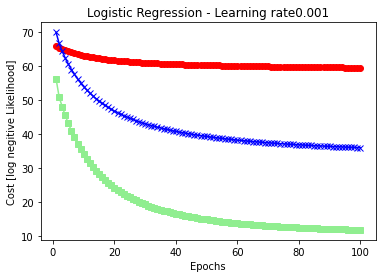

[[0.44320221 0.47710742 0.07969037]
 [0.18023548 0.03366285 0.78610166]
 [0.39075891 0.60522588 0.00401521]
 [0.42270733 0.48672238 0.09057028]
 [0.45925501 0.46343878 0.07730621]
 [0.1995347  0.04206263 0.75840267]
 [0.40912037 0.36111017 0.22976946]
 [0.3934015  0.56311782 0.04348068]
 [0.44741553 0.49646862 0.05611585]
 [0.43865625 0.3961047  0.16523904]
 [0.39321903 0.55730552 0.04947544]
 [0.22594065 0.05099751 0.72306184]
 [0.18205862 0.02920412 0.78873727]
 [0.22360924 0.05045225 0.72593851]
 [0.17550209 0.03742585 0.78707206]
 [0.41379561 0.48586833 0.10033607]
 [0.3735713  0.61019117 0.01623753]
 [0.44489029 0.41166797 0.14344174]
 [0.42494304 0.48924164 0.08581532]
 [0.37981088 0.60286322 0.0173259 ]
 [0.22408532 0.06008052 0.71583416]
 [0.39940389 0.54685556 0.05374055]
 [0.20811258 0.05408954 0.73779788]
 [0.38404942 0.59771441 0.01823617]
 [0.3940855  0.58249753 0.02341697]
 [0.38637495 0.57992763 0.03369741]
 [0.40819404 0.57752797 0.01427799]
 [0.3694433  0.61340635 0.01

In [24]:
import matplotlib.pyplot as plt
lgr=MultiLogisticRegression(n_iter=100, eta=0.001)
lgr.fit(X_train, y_train)
for class_ in lgr.classes:
    plt.plot(range(1, len(lgr.lgrs[class_].cost_)+1), lgr.lgrs[class_].cost_, marker=markers[class_], color=colors[class_], label=labels[class_])
    plt.xlabel('Epochs')
    plt.ylabel('Cost [log negitive Likelihood]')
    plt.title('Logistic Regression - Learning rate'+str(0.001))
plt.show()
y_pred = lgr.predict(X_test)
test_error=(y_test!=y_pred).sum()
y_pred = lgr.predict(X_train)
train_error=(y_train!=y_pred).sum()
train_error
print(lgr.probability(X_test), lgr.predict(X_test), lgr.classes)

/snap/jupyter/6/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log
/snap/jupyter/6/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log
/snap/jupyter/6/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log


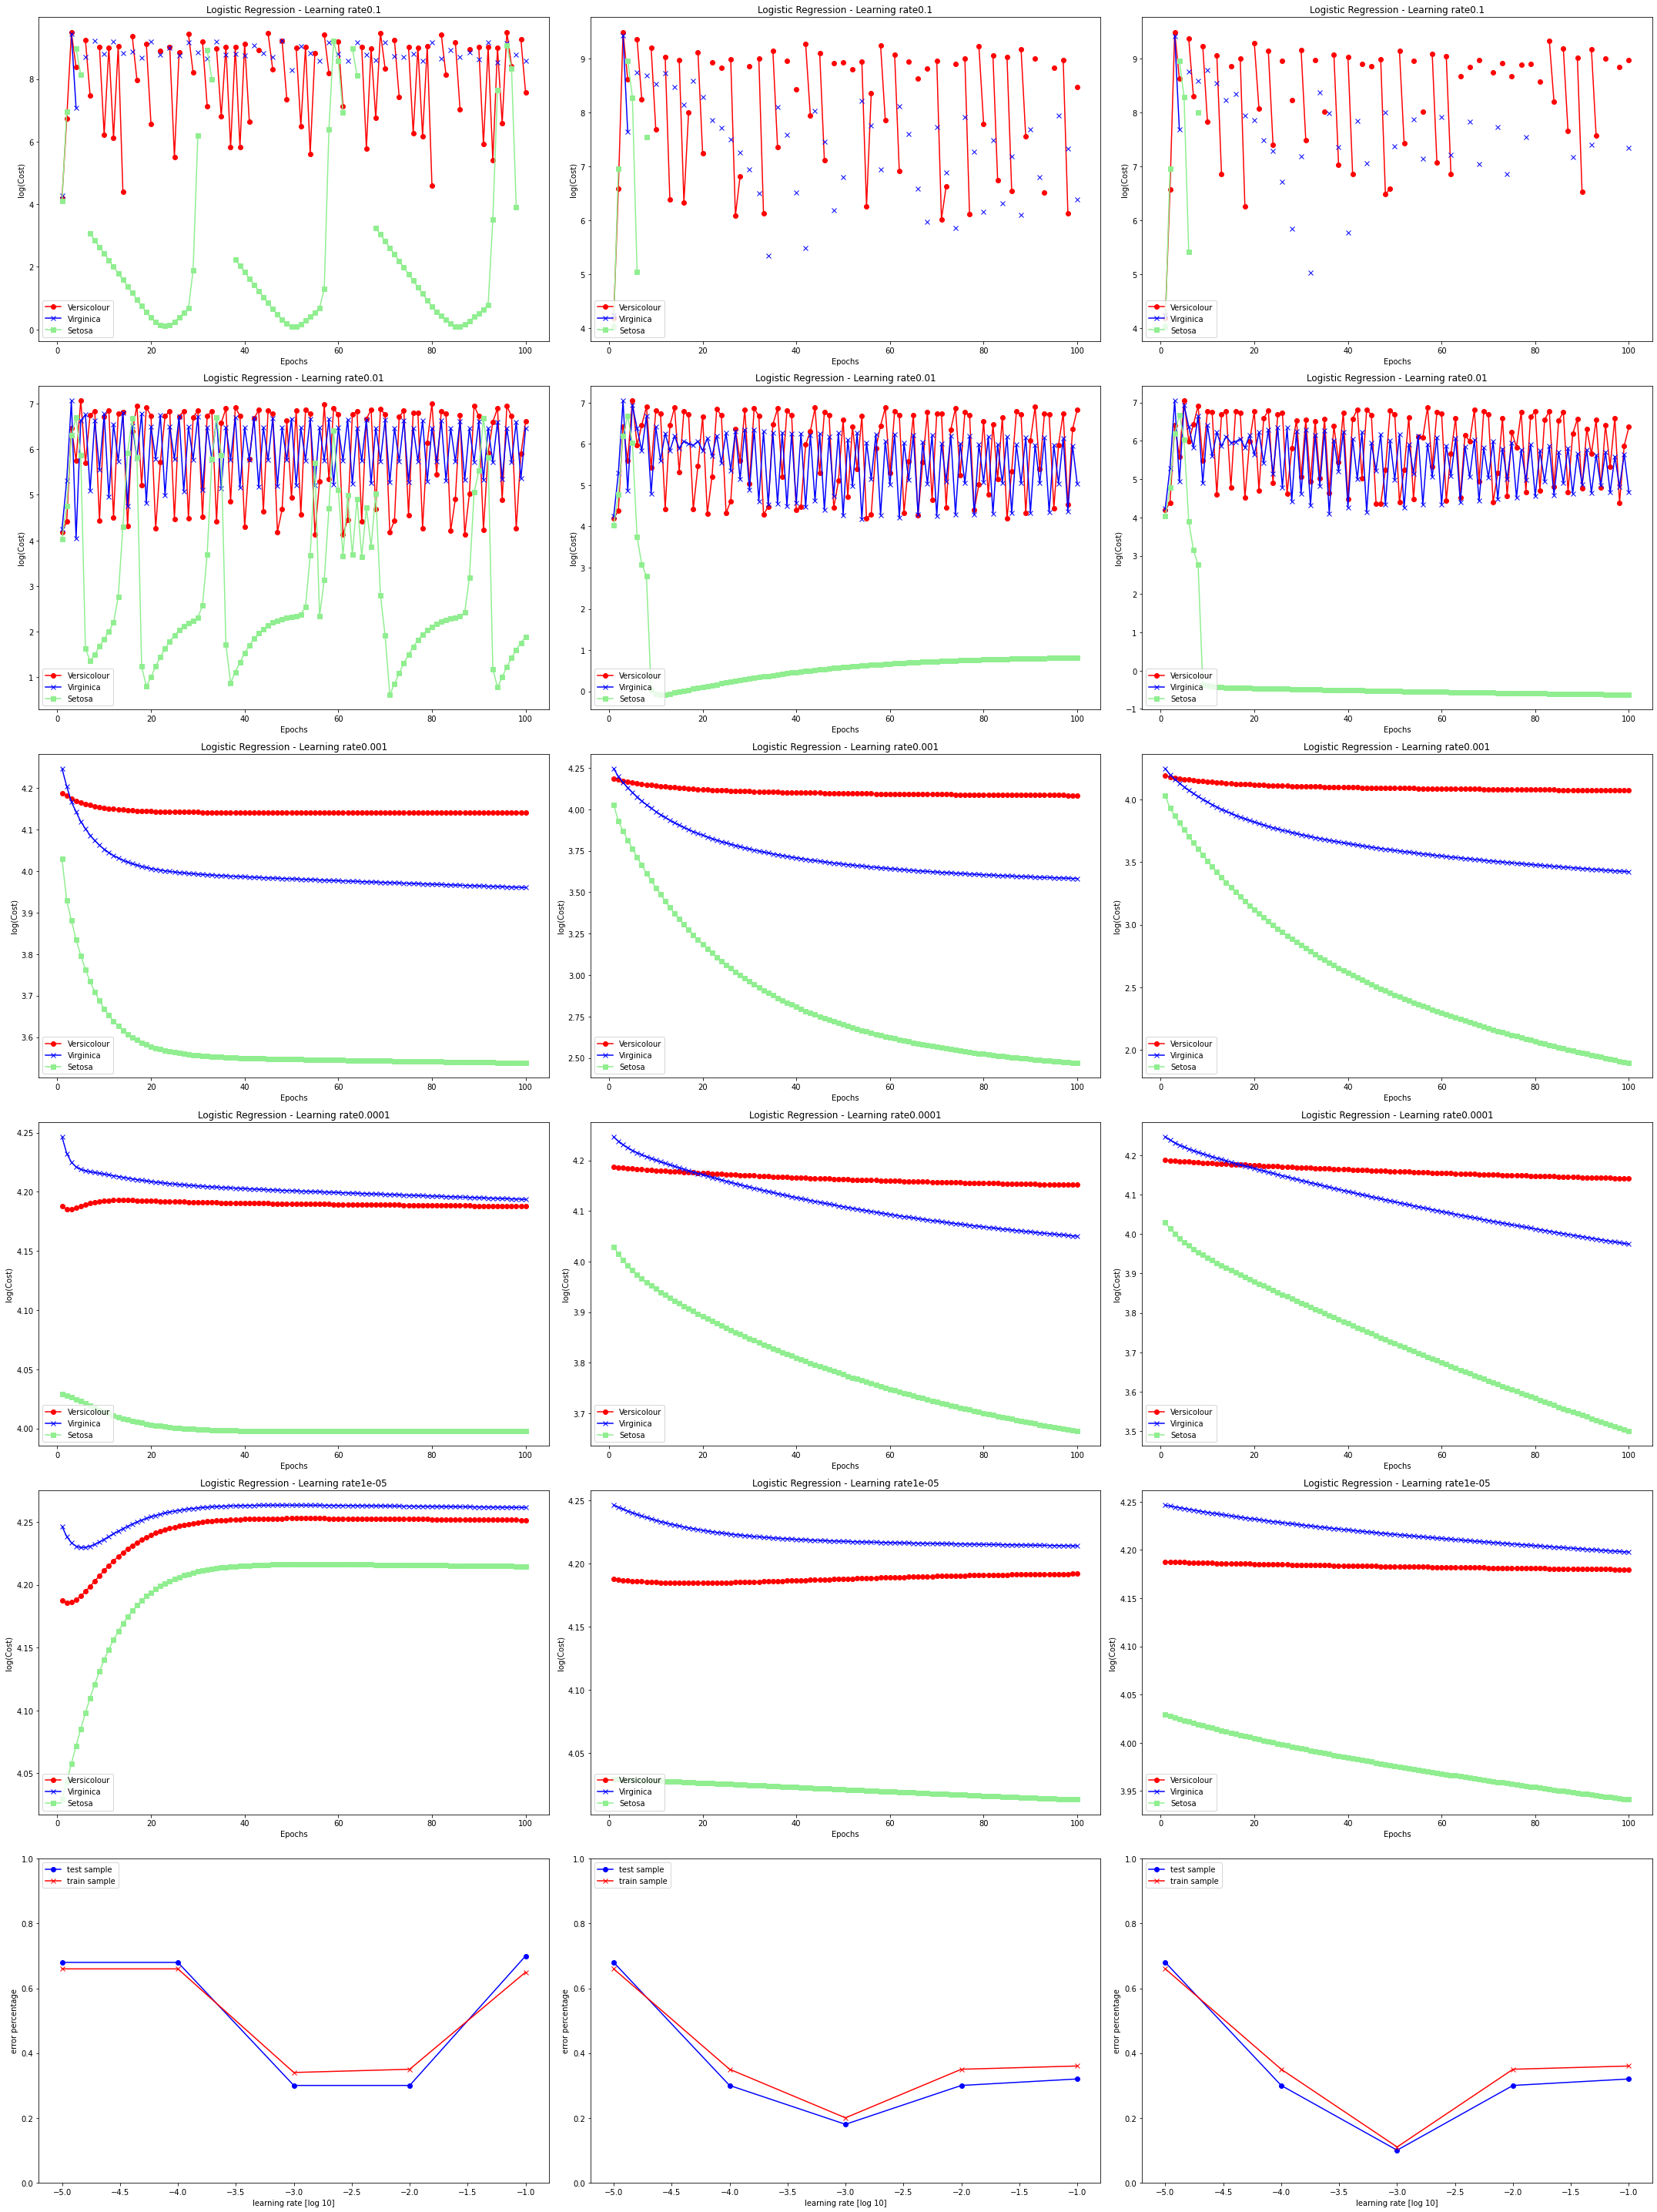

In [6]:
import matplotlib.pyplot as plt
rows, cols = 5, 3
fig, ax = plt.subplots(nrows=rows+1, ncols=cols, figsize=(10*cols, 8*rows))
etas = []
for i in range(rows):
    etas.append(10**(-1-i))
for j in range(cols):
    lgr = []
    test_error = []
    train_error = []
    for i in range(rows):
        lgr.append(MultiLogisticRegression(n_iter=100, eta=etas[i], C=10**(1+j)))
        lgr[i].fit(X_train, y_train)
        for class_ in lgr[i].classes:
            ax[i][j].plot(range(1, len(lgr[i].lgrs[class_].cost_)+1), np.log(lgr[i].lgrs[class_].cost_), marker=markers[class_], color=colors[class_], label=labels[class_])
            ax[i][j].set_xlabel('Epochs')
            ax[i][j].set_ylabel('log(Cost)')
            ax[i][j].set_title('Logistic Regression - Learning rate'+str(etas[i]))
            ax[i][j].legend(loc='lower left')
        y_pred = lgr[i].predict(X_test)
        test_error.append((y_test!=y_pred).sum()/len(y_test))
        y_pred = lgr[i].predict(X_train)
        train_error.append((y_train!=y_pred).sum()/len(y_train))
        
    ax[-1][j].set_xlabel('learning rate [log 10]')
    ax[-1][j].set_ylabel('error percentage')
    ax[-1][j].set_ylim(0, 1)
    ax[-1][j].plot(np.log10(etas), test_error, marker='o', color='blue', label='test sample')
    ax[-1][j].plot(np.log10(etas), train_error, marker='x', color='red', label='train sample')
    ax[-1][j].legend(loc='upper left')
plt.tight_layout()  # auto adjust the layout of whole picture
plt.show()